<a href="https://colab.research.google.com/github/nitinlodhi019/Covid-trail-EDA/blob/main/EDA_on_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

data = pd.read_csv('/content/COVID clinical trials.csv')

#Understand Dataset

##Shape of the data

In [ ]:
data.shape

(5783, 27)

##Data Preview

In [ ]:
data.sample(10)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
803,804,NCT04359095,Effectiveness and Safety of Medical Treatment ...,NaN,Recruiting,No Results Available,COVID-19,Drug: Emtricitabine/tenofovir|Drug: Colchicine...,Mortality|Number of Participants with Treatmen...,Universidad Nacional de Colombia|Pontificia Un...,...,76968,"August 18, 2020","February 28, 2021","May 31, 2021","April 24, 2020",NaN,"February 8, 2021","Clinica santa Maria del lago, Bogota, DC, Colo...",NaN,https://ClinicalTrials.gov/show/NCT04359095
2892,2893,NCT04399889,hCT-MSCs for COVID19 ARDS,NaN,Recruiting,No Results Available,COVID|Corona Virus Infection|COVID19,Biological: human cord tissue mesenchymal stro...,Safety of the Investigational Product|Describe...,"Joanne Kurtzberg, MD|The Marcus Foundation|Duk...",...,Pro00105410,"June 18, 2020","April 1, 2021","July 31, 2021","May 22, 2020",NaN,"June 22, 2020","Duke Hospital, Durham, North Carolina, United ...",NaN,https://ClinicalTrials.gov/show/NCT04399889
1676,1677,NCT04336254,Safety and Efficacy Study of Allogeneic Human ...,NaN,Recruiting,No Results Available,COVID-19,Biological: allogeneic human dental pulp stem ...,TTCI|Lung lesion|Immune function|Time of SARS-...,Renmin Hospital of Wuhan University|Beijing SH...,...,2020K-G005|hDPSC-CoVID-2019-02-2020,"May 6, 2020","November 30, 2021","December 31, 2021","April 7, 2020",NaN,"March 10, 2021",Renmin Hospital of Wuhan University (East Camp...,NaN,https://ClinicalTrials.gov/show/NCT04336254
326,327,NCT04800133,Covid-19 Vaccination in Adolescents,COVA,Recruiting,No Results Available,Covid19,Biological: Tozinameran|Biological: Oxford-Ast...,Adverse reactions/events|Binding antibody resp...,The University of Hong Kong,...,COVA01,April 2021,"March 31, 2025","March 31, 2025","March 16, 2021",NaN,"April 12, 2021","Queen Mary Hospital, Hong Kong, Hong Kong, China",NaN,https://ClinicalTrials.gov/show/NCT04800133
507,508,NCT04471649,Hydroxy Chloroquine and Covid in RA Patients,Covid-19,Recruiting,No Results Available,COVID,NaN,Number of patients in need for hospitalization...,Tanta University,...,002,"June 15, 2020",October 2020,November 2020,"July 15, 2020",NaN,"September 9, 2020","Tanta University Hospital, Tanta, Egypt",NaN,https://ClinicalTrials.gov/show/NCT04471649
3193,3194,NCT04390217,LB1148 for Pulmonary Dysfunction Associated Wi...,NaN,Not yet recruiting,No Results Available,COVID-19|Coronavirus Disease 2019|Covid19|COVI...,Drug: LB1148|Drug: Placebo,Effect of LB1148 on disease progression via me...,"Leading BioSciences, Inc",...,LBS-COVID19-201,"October 31, 2021","December 31, 2021","March 31, 2022","May 15, 2020",NaN,"February 18, 2021",NaN,NaN,https://ClinicalTrials.gov/show/NCT04390217
3175,3176,NCT04826822,Spironolactone and Dexamethasone in Patients H...,SPIDEX-II,Recruiting,No Results Available,"Coronavirus Infection|Pneumonia, Viral",Drug: Spironolactone + Dexamethasone|Drug: Sta...,Evaluation of the clinical status|28-day all-c...,Chita State Regional Clinical Hospital Number 1,...,SPII_1789461,"February 24, 2021","July 8, 2021","September 2, 2021","April 1, 2021",NaN,"April 1, 2021",Chita State Regional Clinical Hospital Number ...,NaN,https://ClinicalTrials.gov/show/NCT04826822
5156,5157,NCT04350723,Awake Prone Position in Hypoxemic Patients Wit...,COVI-PRONE,Recruiting,No Results Available,Corona Virus Infection|Covid19,Procedure: Awake Proning,Endotracheal intubation|Mortality|Invasive mec...,St. Joseph's Healthcare Hamilton|King Abdullah...,...,2154,"June 10, 2020","July 30, 2021","August 30, 2021","April 17, 2020",NaN,"October 22, 2020","St. Joseph's Healthcare Hamilton, Hamilton, On...",NaN,https://ClinicalTrials.gov/show/NCT04350723
5560,5561,NCT04639557,Building Regulation in Dual Generations - Tele...,BRIDGE,Enrolling by invita

##Information about data

In [ ]:
data.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

##Handling missing values

In [ ]:
data.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Acronym,3303
Status,0
Study Results,0
Conditions,0
Interventions,886
Outcome Measures,35
Sponsor/Collaborators,0


In [ ]:
data['Phases'].unique()

array(['Not Applicable', 'Phase 1|Phase 2', nan, 'Early Phase 1',
       'Phase 2|Phase 3', 'Phase 1', 'Phase 4', 'Phase 2', 'Phase 3'],
      dtype=object)

###Drop columns

In [ ]:
data = data.drop(columns=['Acronym', 'Interventions', 'Phases', 'Results First Posted', 'Study Documents', 'Locations'])

In [ ]:
print(data.shape)
data.sample(10)

(5783, 21)


,Rank,NCT Number,Title,Status,Study Results,Conditions,Outcome Measures,Sponsor/Collaborators,Gender,Age,...,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,URL
674,675,NCT04379154,Analysis of Volatile Organic Compounds by Elec...,Recruiting,No Results Available,COVID-19,Profiles of volatile organic compounds (VOCs) ...,Hopital Foch,All,"18 Years and older (Adult, Older Adult)",...,Other,Interventional,Allocation: N/A|Intervention Model: Single Gro...,2020_0060,"April 14, 2020",April 2021,April 2021,"May 7, 2020","March 17, 2021",https://ClinicalTrials.gov/show/NCT04379154
4364,4365,NCT04400006,Ozone Therapy in the Prevention of COVID-19 In...,Completed,No Results Available,Corona Virus Infection,The survey that was taken by telephone calls,Marmara University,All,"18 Years to 90 Years (Adult, Older Adult)",...,Other,Observational,Observational Model: Case-Only|Time Perspectiv...,2761,"May 6, 2020","May 16, 2020","May 17, 2020","May 22, 2020","May 22, 2020",https://ClinicalTrials.gov/show/NCT04400006
5312,5313,NCT04329897,Acceptance and Commitment Therapy Delivered by...,Completed,No Results Available,Hip Osteoarthritis|Knee Osteoarthritis|Mental ...,Change in reported pain intensity score (PROMI...,University of Iowa,All,"18 Years and older (Adult, Older Adult)",...,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,201412701-1,"April 5, 2020","May 15, 2020","June 1, 2020","April 1, 2020","July 16, 2020",https://ClinicalTrials.gov/show/NCT04329897
4354,4355,NCT04497415,The COVID-19 and Healthcare Workers: An Active...,Recruiting,No Results Available,Brief Video-based Intervention|Non Interventio...,Help-seeking behavior|GAD-7|PHQ-9|PC-PTSD|Mora...,"Research Foundation for Mental Hygiene, Inc.",All,"18 Years to 80 Years (Adult, Older Adult)",...,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,8032,"October 21, 2020","November 30, 2020","January 30, 2021","August 4, 2020","October 23, 2020",https://ClinicalTrials.gov/show/NCT04497415
4216,4217,NCT04515225,COVID-19 Prevalence in HIV-infected Patients,Not yet recruiting,No Results Available,HIV Infections,Seroprevalence of SARS-CoV-2,"University Hospital, Strasbourg, France",All,"18 Years and older (Adult, Older Adult)",...,Other,Observational,Observational Model: Cohort|Time Perspective: ...,7947,"September 15, 2020","September 15, 2020","September 15, 2020","August 17, 2020","August 17, 2020",https://ClinicalTrials.gov/show/NCT04515225
1268,1269,NCT04689399,Sensitivity and Specificity of SARS-CoV-2 Rapi...,Completed,No Results Available,Covid19|Rapid Antigen Test|SARS-CoV-2,Sensitivity and specificity of the rapid antig...,"Rigshospitalet, Denmark|Testcenter Danmark, St...",All,"18 Years and older (Adult, Older Adult)",...,Other,Interventional,Allocation: N/A|Intervention Model: Single Gro...,COVID-19,"December 26, 2020","March 25, 2021","March 25, 2021","December 30, 2020","March 30, 2021",https://ClinicalTrials.gov/show/NCT04689399
4625,4626,NCT04373707,Weight-Adjusted vs Fixed Low Doses of Low Mole...,Recruiting,No Results Available,COVID|Thrombosis|Pulmonary Embolism|Deep Vein ...,Venous thromboembolism|Major bleeding|Major Bl...,"Central Hospital, Nancy, France|Ministry of He...",All,"18 Years and older (Adult, Older Adult)",...,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,2020-001709-21,"May 13, 2020",November 2021,November 2021,"May 4, 2020","November 23, 2020",https://ClinicalTrials.gov/show/NCT04373707
5434,5435,NCT04673513,Cognitive Behavioral Therapy for Depression: H...,Recruiting,No Results Available,Depression,Change in Quick Inventory of Depressive Sympto...,Ohio State University,All,"18 Years and older (Adult, Older Adult)",...,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,2020B0354,"December 11, 2020","July 30, 2023","December 30, 2023","December 17, 2020","December 17, 2020",https://Clinic

###Fill missing data

In [ ]:
data.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Status,0
Study Results,0
Conditions,0
Outcome Measures,35
Sponsor/Collaborators,0
Gender,10
Age,0


In [ ]:
data.shape

(5783, 21)

In [ ]:
data.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Status,0
Study Results,0
Conditions,0
Outcome Measures,35
Sponsor/Collaborators,0
Gender,10
Age,0


In [ ]:
data['Outcome Measures'].fillna(data['Outcome Measures'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Enrollment'].fillna(data['Enrollment'].mode()[0], inplace=True)
data['Study Designs'].fillna(data['Study Designs'].mode()[0], inplace=True)
data['Other IDs'].fillna(data['Other IDs'].mode()[0], inplace=True)
data['Start Date'].fillna(data['Start Date'].mode()[0], inplace=True)
data['Primary Completion Date'].fillna(data['Primary Completion Date'].mode()[0], inplace=True)
data['Completion Date'].fillna(data['Completion Date'].mode()[0], inplace=True)


<ipython-input-14-97fd729100db>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Outcome Measures'].fillna(data['Outcome Measures'].mode()[0], inplace=True)
<ipython-input-14-97fd729100db>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
data.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Status,0
Study Results,0
Conditions,0
Outcome Measures,0
Sponsor/Collaborators,0
Gender,0
Age,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Status                   5783 non-null   object 
 4   Study Results            5783 non-null   object 
 5   Conditions               5783 non-null   object 
 6   Outcome Measures         5783 non-null   object 
 7   Sponsor/Collaborators    5783 non-null   object 
 8   Gender                   5783 non-null   object 
 9   Age                      5783 non-null   object 
 10  Enrollment               5783 non-null   float64
 11  Funded Bys               5783 non-null   object 
 12  Study Type               5783 non-null   object 
 13  Study Designs            5783 non-null   object 
 14  Other IDs               

In [ ]:
data.sample(10)

,Rank,NCT Number,Title,Status,Study Results,Conditions,Outcome Measures,Sponsor/Collaborators,Gender,Age,...,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,URL
599,600,NCT04484597,Predictors of COVID-19 Infection and Disease P...,Recruiting,No Results Available,Positive COVID-19 by PCR,correlation of COVID-19 antibody to PCR|correl...,Port Said University,All,"Child, Adult, Older Adult",...,Other,Observational,Observational Model: Case-Control|Time Perspec...,Prof. Refat Sadeq,"March 15, 2020","August 15, 2020","September 15, 2020","July 23, 2020","July 23, 2020",https://ClinicalTrials.gov/show/NCT04484597
5265,5266,NCT04530448,Coronavirus Induced Acute Kidney Injury: Preve...,Recruiting,No Results Available,COVID|Coronavirus|Coronavirus Infection|AKI|Ac...,pH|Number of Days Alive Free of Stage 2-3 AKI|...,West Virginia University,All,"18 Years and older (Adult, Older Adult)",...,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,WVU Protocol #2005006707,"October 5, 2020",January 2021,March 2021,"August 28, 2020","October 19, 2020",https://ClinicalTrials.gov/show/NCT04530448
4886,4887,NCT04363632,Prospective Analysis of Morbi-mortality of Pat...,Completed,No Results Available,Sars-CoV2|Cancer,Mortality of cancer patients under active anti...,Centre Leon Berard,All,"Child, Adult, Older Adult",...,Other,Observational,Observational Model: Cohort|Time Perspective: ...,ET20-069,"April 2, 2020","June 30, 2020","June 30, 2020","April 27, 2020","July 1, 2020",https://ClinicalTrials.gov/show/NCT04363632
5089,5090,NCT04566276,ChulaCov19 mRNA Vaccine in Healthy Adults,Not yet recruiting,No Results Available,COVID-19 Vaccine|Safety Issues,Frequency of Adverse Events|Grade of Adverse E...,Chulalongkorn University|Center of Excellence ...,All,"18 Years to 75 Years (Adult, Older Adult)",...,Other,Interventional,Allocation: Non-Randomized|Intervention Model:...,ChulaVac 001,January 2021,March 2021,June 2021,"September 28, 2020","October 6, 2020",https://ClinicalTrials.gov/show/NCT04566276
5083,5084,NCT04837755,CORONA in the Saarland,Recruiting,No Results Available,Covid19,Correlation of biomarkers with mortality and d...,Universität des Saarlandes,All,"up to 110 Years (Child, Adult, Older Adult)",...,Other,Observational,Observational Model: Case-Only|Time Perspectiv...,CORSAAR1,"March 1, 2020","December 31, 2025","December 31, 2025","April 8, 2021","April 8, 2021",https://ClinicalTrials.gov/show/NCT04837755
3305,3306,NCT04424797,Prone Positioning on Admission for Hospitalize...,Recruiting,No Results Available,COVID-19,Incidence of intubation|Maximum oxygen require...,Poudre Valley Health System,All,"18 Years and older (Adult, Older Adult)",...,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,20-6034,"July 13, 2020",December 2020,December 2020,"June 11, 2020","July 16, 2020",https://ClinicalTrials.gov/show/NCT04424797
2345,2346,NCT04427735,Effect of Covid-19 Epidemic on Primary PCI in ...,Recruiting,No Results Available,STEMI,MACE (major adverse cardiovascular events)|all...,Beijing Friendship Hospital,All,"Child, Adult, Older Adult",...,Other,Observational,Observational Model: Case-Crossover|Time Persp...,BFH-COVID-19 and Primary PCI,"January 24, 2019","July 24, 2021","July 24, 2021","June 11, 2020","June 11, 2020",https://ClinicalTrials.gov/show/NCT04427735
2066,2067,NCT04354701,COVID-19 and Cancer Consortium Registry,Recruiting,No Results Available,COVID-19|Invasive Malignancy (Any Type),Web-based REDCap survey,Vanderbilt-Ingram Cancer Center,All,"18 Years and older (Adult, Older Adult)",...,Other,Observational,Observational Model: Case-Only|Time Perspectiv...,VICC MD 2032,"March 17, 2020",December 2021,December 2022,"April 21, 2020","November 19, 2020",https://ClinicalTrials.gov/show/NCT04354701
647,648,NCT04358809,Clinical Trial of Mycobacterium w in COVID-19 ...,Recruiting,No Results Available,COVID-19,Number of pat

##Duplicate data

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions',
       'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age',
       'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs',
       'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Last Update Posted', 'URL'],
      dtype='object')

#EDA

##Univariate

###Status

---Status Distribution---
Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


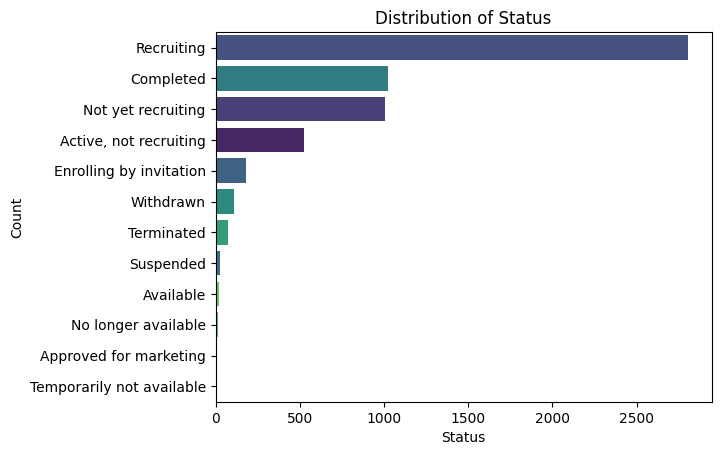

In [ ]:
print("---Status Distribution---")
print(data['Status'].value_counts())
sns.countplot(data=data, y='Status', order=data['Status'].value_counts().index, palette='viridis', hue='Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title("Distribution of Status")
plt.show()

###Gender

---Gender Distribution---
Gender
All       5577
Female     162
Male        44
Name: count, dtype: int64


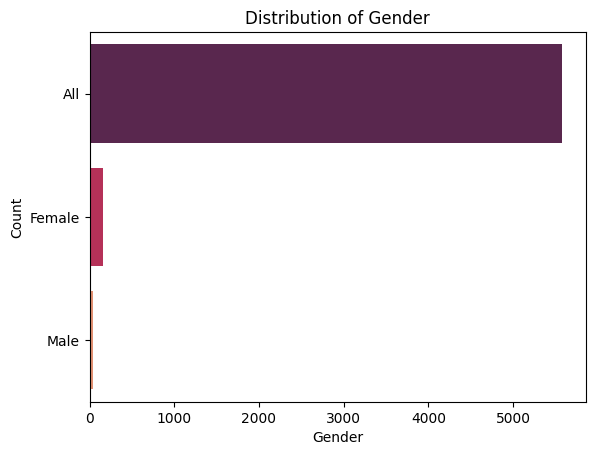

In [ ]:
print("---Gender Distribution---")
print(data['Gender'].value_counts())
sns.countplot(data=data, y='Gender', order=data['Gender'].value_counts().index, palette='rocket', hue='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Distribution of Gender")
plt.show()

###Study Type

---Study Type Distribution---
Study Type
Interventional                                                         3322
Observational                                                          2427
Expanded Access:Intermediate-size Population                             15
Expanded Access:Treatment IND/Protocol                                    8
Expanded Access:Intermediate-size Population|Treatment IND/Protocol       5
Expanded Access:Individual Patients                                       3
Expanded Access:Individual Patients|Intermediate-size Population          1
Expanded Access                                                           1
Expanded Access:Individual Patients|Treatment IND/Protocol                1
Name: count, dtype: int64


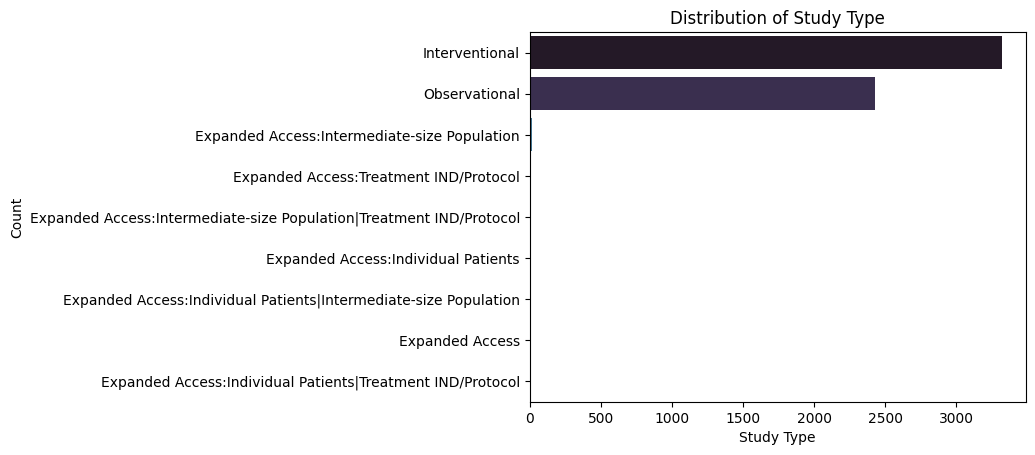

In [ ]:
print("---Study Type Distribution---")
print(data['Study Type'].value_counts())
sns.countplot(data=data, y='Study Type', order=data['Study Type'].value_counts().index, palette='mako', hue='Study Type')
plt.xlabel('Study Type')
plt.ylabel('Count')
plt.title("Distribution of Study Type")
plt.show()

###Top Sponsors/Collaborators

---Top Sponsors/Collaborators---
Sponsor/Collaborators
Assistance Publique - Hôpitaux de Paris    78
Assiut University                          57
University Hospital, Strasbourg, France    40
University Hospital, Montpellier           34
Hospices Civils de Lyon                    31
Name: count, dtype: int64


<ipython-input-48-48794fa33ab9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sponsors.index, x=top_sponsors.values, palette='viridis')


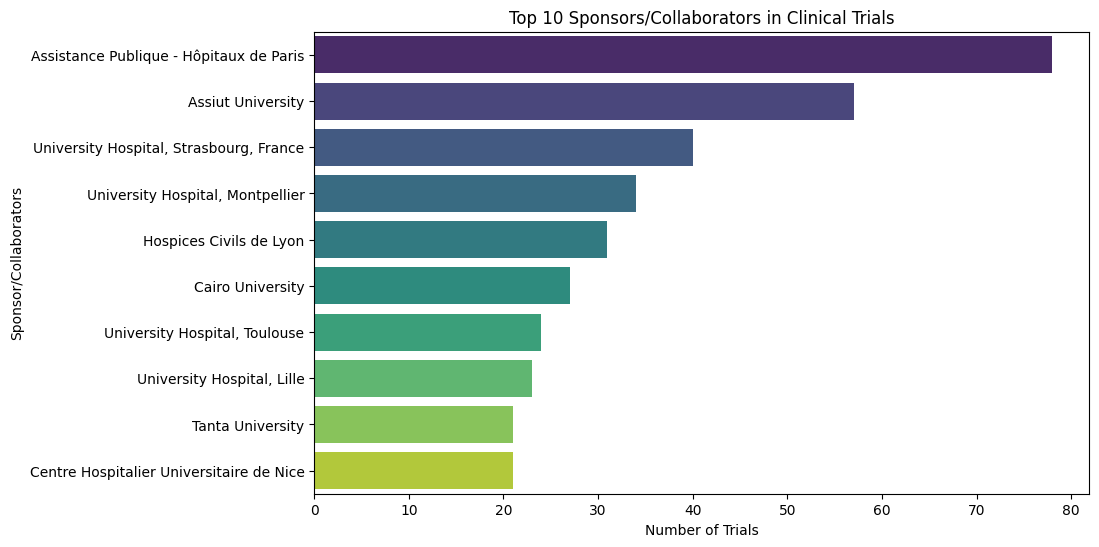

In [ ]:
print("---Top Sponsors/Collaborators---")
print(data['Sponsor/Collaborators'].value_counts().head())
plt.figure(figsize=(10, 6))
top_sponsors = data['Sponsor/Collaborators'].value_counts().head(10)
sns.barplot(y=top_sponsors.index, x=top_sponsors.values, palette='viridis')
plt.title('Top 10 Sponsors/Collaborators in Clinical Trials')
plt.xlabel('Number of Trials')
plt.ylabel('Sponsor/Collaborators')
plt.show()